<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
#import pandas as pd
from pandas import DataFrame, Series
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#import dataset

url = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'
df = pd.read_csv(url, header = 0, sep =',')

In [0]:
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,...,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,...,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,...,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,...,0.5,928,480,7872,11756,208,0,246,13899,35389
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,...,0.5,803,398,4714,8381,169,0,156,8505,23126


In [0]:
# Convert weekdays into integers

weekday = {'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df.Weekday = [weekday[item] for item in df.Weekday]
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
0,2017-03-01,2017,3,2017-03,1,3,False,13.1,-1.9,5.6,...,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
1,2017-03-02,2017,3,2017-03,2,4,False,-1.3,-6.4,-3.9,...,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2,2017-03-03,2017,3,2017-03,3,5,False,-4.3,-8.1,-6.2,...,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
3,2017-03-04,2017,3,2017-03,4,6,False,-6.5,-11.9,-9.2,...,0.5,928,480,7872,11756,208,0,246,13899,35389
4,2017-03-05,2017,3,2017-03,5,7,False,-0.4,-10.6,-5.5,...,0.5,803,398,4714,8381,169,0,156,8505,23126


In [0]:
'''Select January 2018 and 2019 as a sample'''

jan_df =df[(df.Month == 1) & (df.Year != 2020)]
jan_df.head(3)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
306,2018-01-01,2018,1,2018-01,1,1,True,-7.9,-18.6,-13.3,...,0.0,857,366,3844,6347,96,0,131,8728,20369
307,2018-01-02,2018,1,2018-01,2,2,False,-7.1,-12.5,-9.8,...,0.0,7706,10584,20084,25182,12040,4359,6969,74432,161356
308,2018-01-03,2018,1,2018-01,3,3,False,-5.3,-11.2,-8.3,...,0.0,8883,11238,21526,27528,13240,4756,7549,81222,175942


Plot Riderships from Union Station both for 2018 and 2019. 
We can notice 2 outliers, due to the bank holiday of the 1st of January

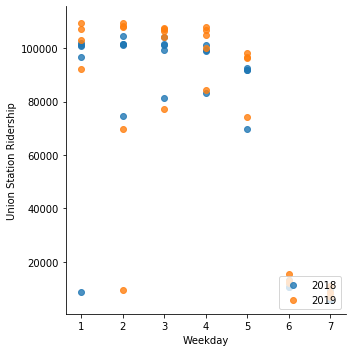

In [0]:
import seaborn as sns

sns.lmplot(x='Weekday', y='Union Station Ridership', data=jan_df, fit_reg=False, hue = 'Year', legend = False)
plt.legend(loc='lower right')

In [0]:
# Organizing the data as numpy vectors
Y=jan_df['Union Station Ridership'] #
X=jan_df['Weekday'].values.reshape(-1,1)

#the model to do the fit
model = sklearn.linear_model.LinearRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

[-14390.97270604]
127425.07220553889


In [0]:
'''Let's calculate the predicted value of count,
using the result of our model with one variable X'''

lin_predicted_one = model.predict(X)
lin_predicted_one

array([113034.0994995 ,  98643.12679346,  84252.15408742,  69861.18138138,
        55470.20867534,  41079.2359693 ,  26688.26326326, 113034.0994995 ,
        98643.12679346,  84252.15408742,  69861.18138138,  55470.20867534,
        41079.2359693 ,  26688.26326326, 113034.0994995 ,  98643.12679346,
        84252.15408742,  69861.18138138,  55470.20867534,  41079.2359693 ,
        26688.26326326, 113034.0994995 ,  98643.12679346,  84252.15408742,
        69861.18138138,  55470.20867534,  41079.2359693 ,  26688.26326326,
       113034.0994995 ,  98643.12679346,  84252.15408742,  98643.12679346,
        84252.15408742,  69861.18138138,  55470.20867534,  41079.2359693 ,
        26688.26326326, 113034.0994995 ,  98643.12679346,  84252.15408742,
        69861.18138138,  55470.20867534,  41079.2359693 ,  26688.26326326,
       113034.0994995 ,  98643.12679346,  84252.15408742,  69861.18138138,
        55470.20867534,  41079.2359693 ,  26688.26326326, 113034.0994995 ,
        98643.12679346,  

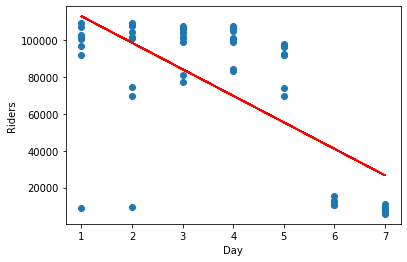

In [0]:
'''The graph below shows how the model (line) fits the data'''
plt.scatter(x=jan_df["Weekday"], y=jan_df["Union Station Ridership"])
plt.plot(X, model.predict(X), 'r-')
plt.xlabel("Day")
plt.ylabel('Riders');

We can notice that the weekends (day 6 and 7, corresponding to Saturday and Sunday), are altering the model. Let's try to repeat the operation without the weekends.

In [0]:
'''Filtering out Saturdays and Sundays'''

jan_week_df =df[(df.Month == 1) & (df.Year != 2020) & (df.Weekday != 6 )& (df.Weekday != 7)]
jan_week_df.head(7)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
306,2018-01-01,2018,1,2018-01,1,1,True,-7.9,-18.6,-13.3,...,0.0,857,366,3844,6347,96,0,131,8728,20369
307,2018-01-02,2018,1,2018-01,2,2,False,-7.1,-12.5,-9.8,...,0.0,7706,10584,20084,25182,12040,4359,6969,74432,161356
308,2018-01-03,2018,1,2018-01,3,3,False,-5.3,-11.2,-8.3,...,0.0,8883,11238,21526,27528,13240,4756,7549,81222,175942
309,2018-01-04,2018,1,2018-01,4,4,False,-7.7,-19.7,-13.7,...,0.0,9053,11524,22180,29317,13227,4710,7638,83312,180961
310,2018-01-05,2018,1,2018-01,5,5,False,-14.7,-20.6,-17.7,...,0.0,7288,9732,18905,26146,10751,3744,6346,69545,152457
313,2018-01-08,2018,1,2018-01,8,1,False,3.0,-1.7,0.7,...,0.0,11247,13855,25339,34146,15404,5607,9556,96720,211874
314,2018-01-09,2018,1,2018-01,9,2,False,1.6,-0.6,0.5,...,0.0,11511,14158,25777,34585,16377,6094,9476,101278,219256


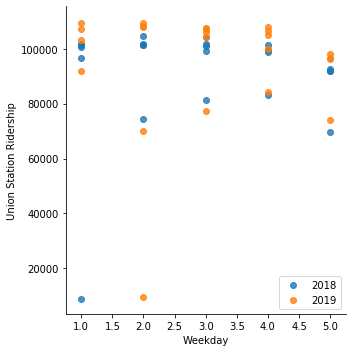

In [0]:
'''Reploting the data'''

import seaborn as sns

sns.lmplot(x='Weekday', y='Union Station Ridership', data=jan_week_df, fit_reg=False, hue = 'Year', legend = False)
plt.legend(loc='lower right')

In [0]:
# Organizing the data as numpy vectors


Y=jan_week_df['Union Station Ridership']
X=jan_week_df['Weekday'].values.reshape(-1,1)

#the model to do the fit
model2 = sklearn.linear_model.LinearRegression().fit(X, Y)
print(model2.coef_)
print(model2.intercept_)

[685.82018532]
91401.65815176559


In [0]:
'''Let's calculate the predicted value of count,
using the result of our model with one variable X'''

lin_predicted_one = model2.predict(X)
lin_predicted_one

array([92087.47833709, 92773.29852241, 93459.11870774, 94144.93889306,
       94830.75907839, 92087.47833709, 92773.29852241, 93459.11870774,
       94144.93889306, 94830.75907839, 92087.47833709, 92773.29852241,
       93459.11870774, 94144.93889306, 94830.75907839, 92087.47833709,
       92773.29852241, 93459.11870774, 94144.93889306, 94830.75907839,
       92087.47833709, 92773.29852241, 93459.11870774, 92773.29852241,
       93459.11870774, 94144.93889306, 94830.75907839, 92087.47833709,
       92773.29852241, 93459.11870774, 94144.93889306, 94830.75907839,
       92087.47833709, 92773.29852241, 93459.11870774, 94144.93889306,
       94830.75907839, 92087.47833709, 92773.29852241, 93459.11870774,
       94144.93889306, 94830.75907839, 92087.47833709, 92773.29852241,
       93459.11870774, 94144.93889306])

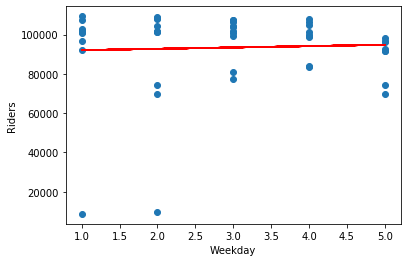

In [0]:
''' Reploting the data'''
plt.scatter(x=jan_week_df["Weekday"], y=jan_week_df["Union Station Ridership"])
plt.plot(X, model2.predict(X), 'r-')
plt.xlabel("Weekday")
plt.ylabel('Riders');

In [0]:
'''Selecting Janurary 2020 for comparion'''
jan20_df =df[(df.Month == 1) & (df.Year == 2020) & (df.Weekday != 6 )& (df.Weekday != 7)]

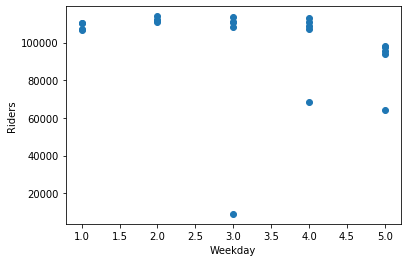

In [0]:
plt.scatter(x=jan20_df["Weekday"], y=jan20_df["Union Station Ridership"])
plt.plot()
plt.xlabel("Weekday")
plt.ylabel('Riders');